In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_excel('Desktop/football project/performance_1.xlsx')
df

,appearance_id,game_id,player_id_x,Date of birth,Age,date_x,player_name_x,competition_id_x,yellow_cards,red_cards,...,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_name,away_club_name,aggregate,competition_type
0,2224728_119169,2224728,119169,1990-11-10,35.0,2012-07-13,Aron Johannsson,DK1,0,0,...,7,Peter Rensen,Kent Nielsen,Ceres Park,9728,Michael Svendsen,Aarhus Gymnastik Forening,Aalborg BK,01:01:00,domestic_league
1,2224732_161244,2224732,161244,1988-10-20,37.0,2012-07-14,Conor O'Brien,DK1,0,0,...,12,Lars Sondergaard,Colin Todd,Sydbank Park,2995,Claus Bo Larsen,Sonderjyske Fc,Randers Fodbold Club,06:01:00,domestic_league
2,2224729_39467,2224729,39467,1982-05-17,43.0,2012-07-15,Clarence Goodson,DK1,0,0,...,5,Auri Skarbalius,Troels Bech,Brondby Stadium,10806,Lars Christoffersen,Brondby IF,Odense Boldklub,00:01:00,domestic_league
3,2232104_119169,2232104,119169,1990-11-10,35.0,2012-07-19,Aron Johannsson,ELQ,0,0,...,Unknown,Peter Rensen,Temur Shalamberidze,Ceres Park,9000,Boako Jovanetic,Aarhus Gymnastik Forening,Unknown,01:02:00,international_cup
4,2219794_39475,2219794,39475,1985-09-09,40.0,2012-07-22,Sacha Kljestan,BESC,0,0,...,Unknown,John van den Brom,Peter Maes,Constant Vanden Stock Stadion,14485,Laurent Colemonts,Royal Sporting Club Anderlecht,KSC Lokeren (- 2020),03:02:00,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,3415291_537467,3415291,537467,1996-08-29,29.0,2020-09-26,Joseph Efford,BE1,0,0,...,18,Hernan Losada,Nicky Hayen,Olympisch Stadion,3200,Wesli De Cremer,Beerschot V.A.,SK Beveren,03:02:00,domestic_league
3805,3415296_367423,3415296,367423,2000-02-08,25.0,2020-09-26,Chris Durkin,BE1,1,0,...,16,Wouter Vrancken,Kevin Muscat,AFAS Stadion,5185,Nathan Verboomen,Yellow-Red Koninklijke Voetbalclub Mechelen,Koninklijke Sint-Truidense Voetbalvereniging,02:00:00,domestic_league
3806,3431983_478940,3431983,478940,1998-06-11,27.0,2020-09-26,Reggie Cannon,PO1,0,0,...,1,Vasco Seabra,Sergio Conceicao,Estádio do Bessa,27095,Luís Godinho,Boavista Futebol Clube,Futebol Clube do Porto,00:05:00,domestic_league
3807,3450575_361104,3450575,361104,2000-11-03,25.0,2020-09-26,Sergino Dest,NL1,0,0,...,6,Erik ten Hag,Thomas Letsch,Johan Cruijff ArenA,15000,Pol van Boekel,AFC Ajax Amsterdam,Stichting Betaald Voetbal Vitesse Arnhem,02:01:00,domestic_league


Are younger players offered longer contracts compared to older players?

In [9]:
df['top_performer'] = df['Goal contribution per 90 minutes'] > df['Goal contribution per 90 minutes'].mean()


In [13]:
# Example: younger top performers get "long" contracts
df['assumed_contract_category'] = 'medium'
df.loc[(df['Age'] <= 23) & (df['top_performer'] == True), 'assumed_contract_category'] = 'long'
df.loc[(df['Age'] >= 30) & (df['top_performer'] == False), 'assumed_contract_category'] = 'short'


In [ ]:
Columns you can use

Feature:

age

Optionally: goals, assists, minutes_played, Goal contribution per 90 minutes

Target:

assumed_contract_category (short, medium, long)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['Age', 'goals', 'assists', 'minutes_played', 'Goal contribution per 90 minutes']]
y = df['assumed_contract_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      medium       1.00      1.00      1.00       296
       short       1.00      1.00      1.00       466

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



Visualization

C:\Users\Lavyna\AppData\Local\Temp\ipykernel_19276\1439103359.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='assumed_contract_category', y='Age', data=avg_age, palette='viridis')


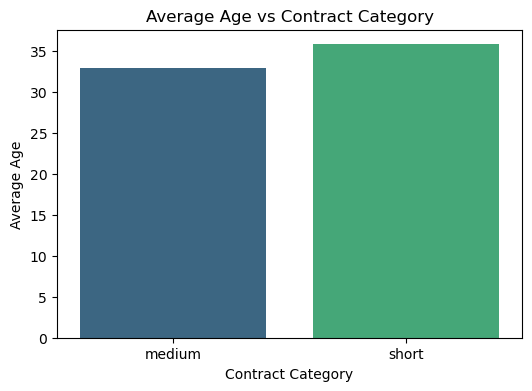

In [21]:
import seaborn as snsplt.figure(figsize=(8,5))
sns.scatterplot(x='Goal contribution per 90 minutes', y='age', 
                hue='assumed_contract_category', data=df, s=100, palette='coolwarm')
plt.title("Goal Contribution per 90 vs Age by Contract Category")
plt.xlabel("Goal Contribution per 90 minutes")
plt.ylabel("Age")
plt.legend(title="Contract Category")
plt.show()

avg_age = df.groupby('assumed_contract_category')['Age'].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='assumed_contract_category', y='Age', data=avg_age, palette='viridis')
plt.title("Average Age vs Contract Category")
plt.xlabel("Contract Category")
plt.ylabel("Average Age")
plt.show()

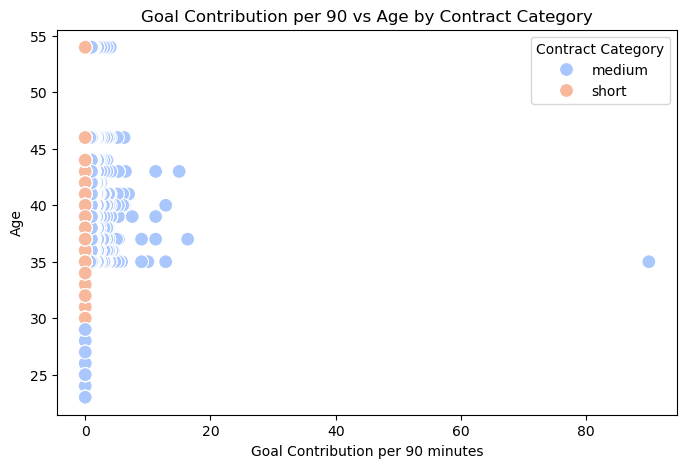

In [23]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Goal contribution per 90 minutes', y='Age', 
                hue='assumed_contract_category', data=df, s=100, palette='coolwarm')
plt.title("Goal Contribution per 90 vs Age by Contract Category")
plt.xlabel("Goal Contribution per 90 minutes")
plt.ylabel("Age")
plt.legend(title="Contract Category")
plt.show()


In [25]:
# Define top performers (e.g., goal contribution per 90 above average)
top_players = df[df['Goal contribution per 90 minutes'] > df['Goal contribution per 90 minutes'].mean()]

# Select relevant columns
top_players_table = top_players[['player_name_x', 'Age', 'goals', 'assists', 
                                 'minutes_played', 'Goal contribution per 90 minutes', 
                                 'assumed_contract_category']]

# Sort by performance
top_players_table = top_players_table.sort_values(by='Goal contribution per 90 minutes', ascending=False)

# Display top 10 players
print(top_players_table.head(10))


      player_name_x   Age  goals  assists  minutes_played  \
0   Aron Johannsson  35.0      0        0              90   
1     Conor O'Brien  37.0      1        0              90   
2  Clarence Goodson  43.0      0        0              90   
4    Sacha Kljestan  40.0      0        0               3   
3   Aron Johannsson  35.0      0        0              74   
5  Clarence Goodson  43.0      0        0              90   
6    Charlie Davies  39.0      0        0              21   
7     Conor O'Brien  37.0      0        1              90   
8   Aron Johannsson  35.0      0        0              73   
9   Aron Johannsson  35.0      0        0              43   

   Goal contribution per 90 minutes assumed_contract_category  
0                         90.000000                    medium  
1                         16.363636                    medium  
2                         15.000000                    medium  
4                         12.857143                    medium  
3       

Which clubs tend to give the longest contracts for top-performing players?

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assume df is your football dataset
# Columns: 'player_name_x','age','goals','assists','minutes_played','Goal contribution per 90 minutes','home_club_name'

# 1. Create contract categories (proxy)
df['assumed_contract_category'] = 'short'  # default

# Medium: top 50% performers
median_gc = df['Goal contribution per 90 minutes'].median()
df.loc[df['Goal contribution per 90 minutes'] > median_gc, 'assumed_contract_category'] = 'medium'

# Long: top 10% performers
quantile_90 = df['Goal contribution per 90 minutes'].quantile(0.9)
df.loc[df['Goal contribution per 90 minutes'] > quantile_90, 'assumed_contract_category'] = 'long'

# Check class distribution
print("Class distribution:\n", df['assumed_contract_category'].value_counts())

# 2. Features and target
X = df[['Age','goals','assists','minutes_played','Goal contribution per 90 minutes','home_club_name']]
X = pd.get_dummies(X, columns=['home_club_name'], drop_first=True)
y = df['assumed_contract_category']

# 3. Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Classification report
print(classification_report(y_test, y_pred))

# 7. Feature importance
importances = model.feature_importances_
features = X.columns
feature_importance = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print("Top 10 important features:\n", feature_importance.head(10))


Class distribution:
 assumed_contract_category
short     3134
long       371
medium     304
Name: count, dtype: int64
              precision    recall  f1-score   support

        long       0.99      0.99      0.99        74
      medium       0.98      0.98      0.98        61
       short       1.00      1.00      1.00       627

    accuracy                           1.00       762
   macro avg       0.99      0.99      0.99       762
weighted avg       1.00      1.00      1.00       762

Top 10 important features:
                                             feature  importance
4                  Goal contribution per 90 minutes    0.719240
0                                               Age    0.103230
3                                    minutes_played    0.028074
1                                             goals    0.015637
18         home_club_name_Aarhus Gymnastik Forening    0.013345
225  home_club_name_Tottenham Hotspur Football Club    0.006062
2                        

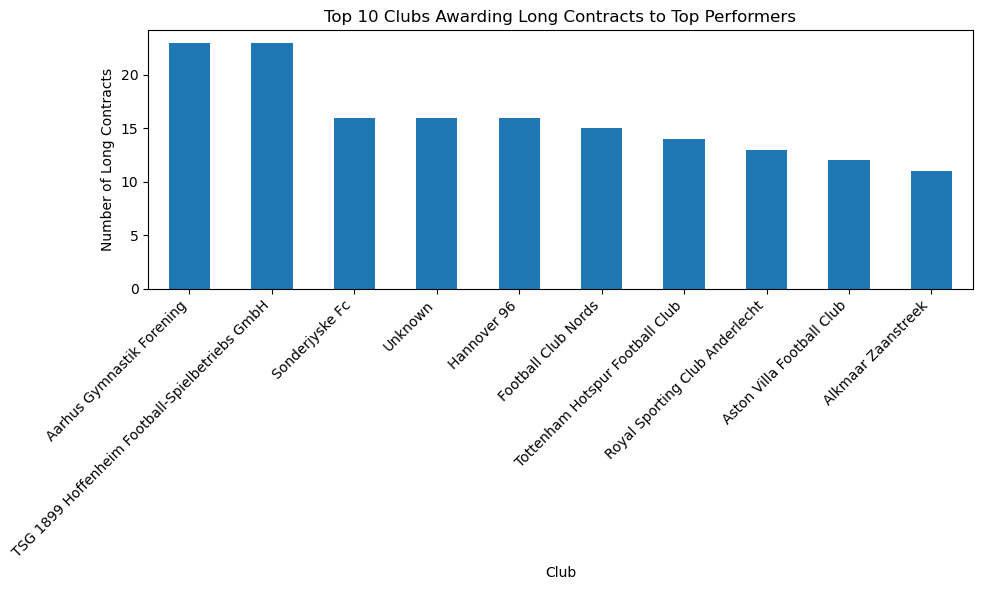

In [7]:
import matplotlib.pyplot as plt

# 1. Filter top-performing players (long contracts)
long_contracts = df[df['assumed_contract_category'] == 'long']

# 2. Count how many long contracts per club
club_long_counts = long_contracts['home_club_name'].value_counts().head(10)

# 3. Plot bar chart
plt.figure(figsize=(10,6))
club_long_counts.plot(kind='bar')
plt.title('Top 10 Clubs Awarding Long Contracts to Top Performers')
plt.xlabel('Club')
plt.ylabel('Number of Long Contracts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


“Do players with more yellow/red cards receive shorter contracts?”

In [43]:
import pandas as pd
from scipy.stats import f_oneway

# Assume df is your dataset with 'assumed_contract_category' and 'yellow_cards'

# Separate yellow card counts by contract category
yellow_short = df[df['assumed_contract_category']=='short']['yellow_cards']
yellow_medium = df[df['assumed_contract_category']=='medium']['yellow_cards']
yellow_long = df[df['assumed_contract_category']=='long']['yellow_cards']

# One-way ANOVA
f_stat, p_value = f_oneway(yellow_short, yellow_medium, yellow_long)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0 → Yellow cards differ significantly between contract categories")
else:
    print("Fail to reject H0 → No significant difference in yellow cards")


F-statistic: 8.670667639790235
p-value: 0.00017495630698597636
Reject H0 → Yellow cards differ significantly between contract categories


In [45]:
red_short = df[df['assumed_contract_category']=='short']['red_cards']
red_medium = df[df['assumed_contract_category']=='medium']['red_cards']
red_long = df[df['assumed_contract_category']=='long']['red_cards']

f_stat, p_value = f_oneway(red_short, red_medium, red_long)
print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0 → Red cards differ significantly between contract categories")
else:
    print("Fail to reject H0 → No significant difference in Red cards")

F-statistic: 0.33596807817543517
p-value: 0.7146671103288977
Fail to reject H0 → No significant difference in Red cards


Overall Conclusion

Yellow cards → shorter contracts

Red cards → no significant effect

Key takeaway: Minor disciplinary issues (yellow cards) influence contract decisions, but severe penalties (red cards) do not show a clear pattern, possibly due to low occurrence.